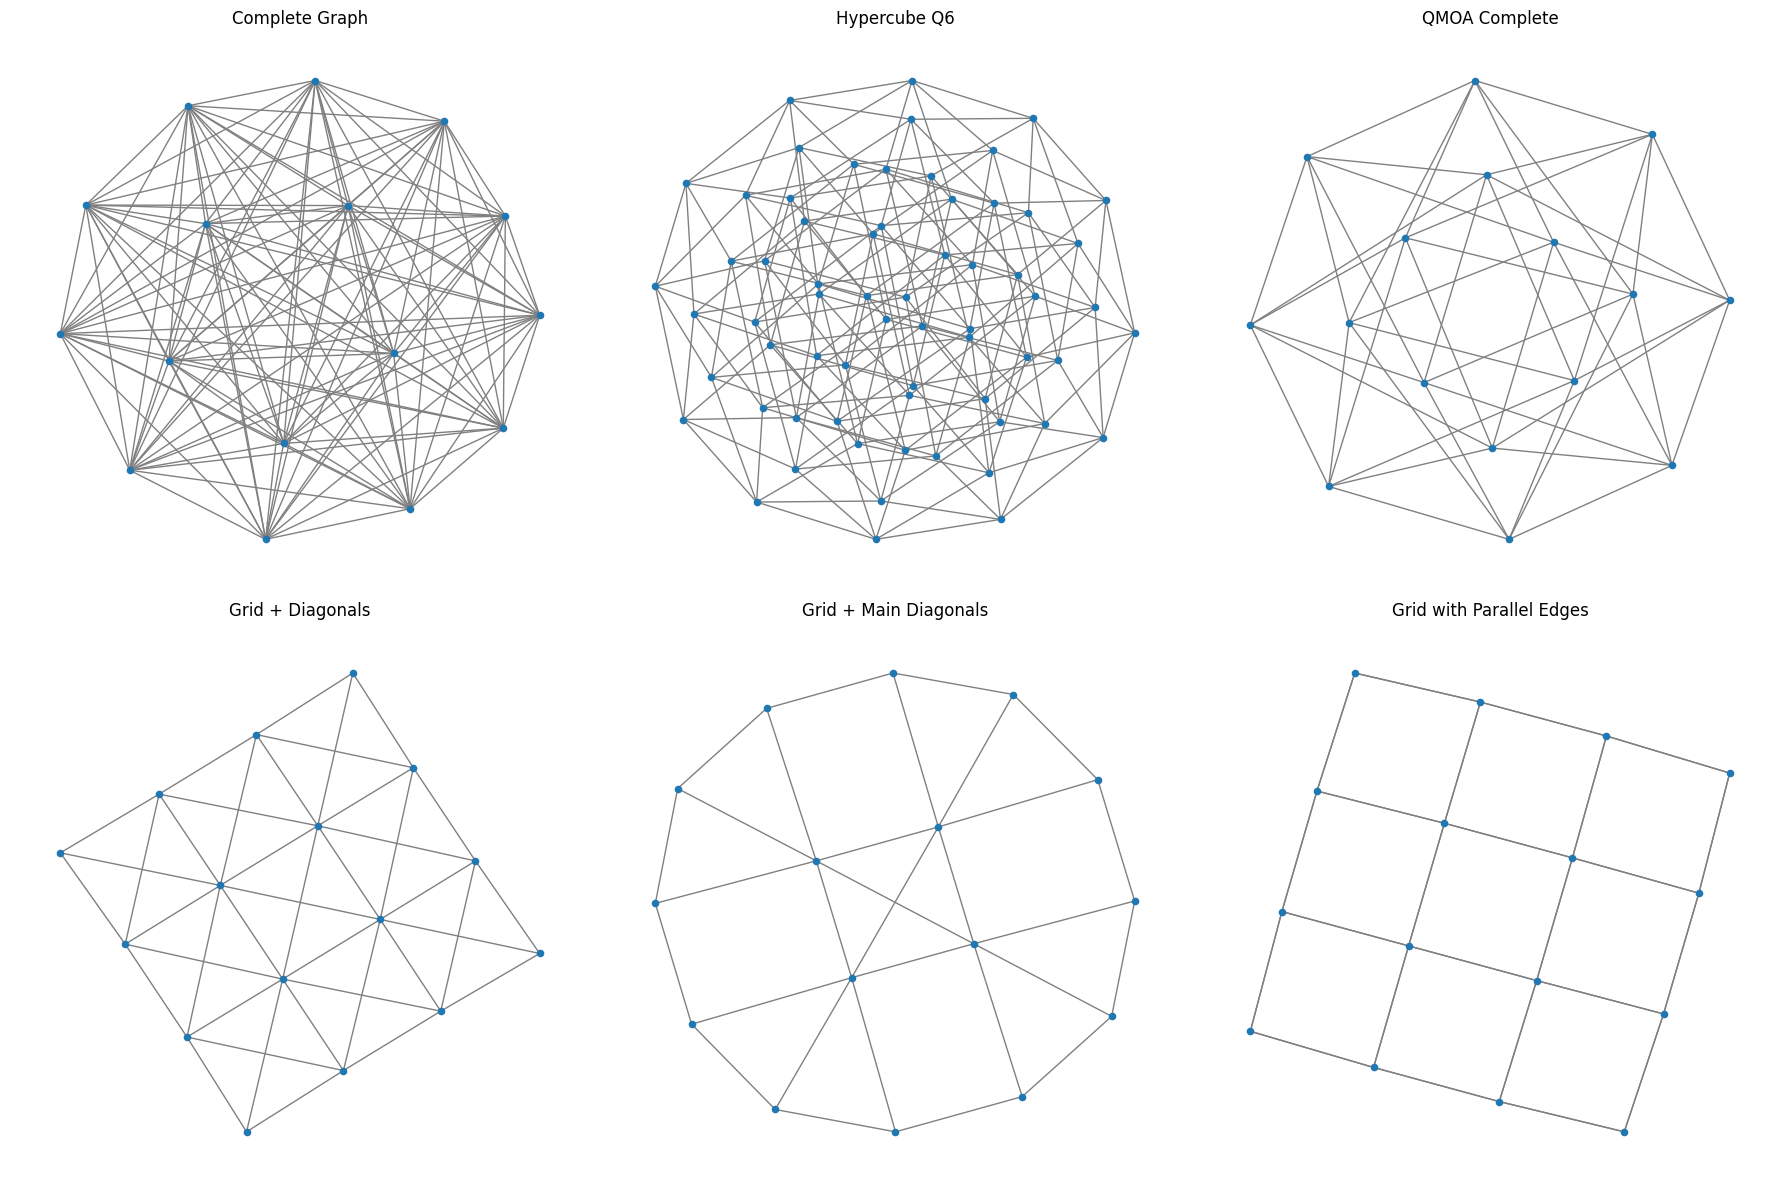

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Use Graphviz layout
from networkx.drawing.nx_agraph import graphviz_layout

rows, cols = 4, 4
n = rows * cols

# === GRAPH CONSTRUCTORS ===

# QMOA Complete: all-to-all connections in each row and column
def build_qmoa_complete(rows, cols):
    G = nx.grid_2d_graph(rows, cols)
    for r in range(rows):
        row_nodes = [(r, c) for c in range(cols)]
        for i in range(len(row_nodes)):
            for j in range(i + 1, len(row_nodes)):
                G.add_edge(row_nodes[i], row_nodes[j])
    for c in range(cols):
        col_nodes = [(r, c) for r in range(rows)]
        for i in range(len(col_nodes)):
            for j in range(i + 1, len(col_nodes)):
                G.add_edge(col_nodes[i], col_nodes[j])
    return G

# Grid + Diagonals (small square diagonals)
def build_grid_with_diagonals(rows, cols):
    G = nx.grid_2d_graph(rows, cols)
    for i in range(rows - 1):
        for j in range(cols - 1):
            G.add_edge((i, j), (i + 1, j + 1))
            G.add_edge((i + 1, j), (i, j + 1))
    return G

# Grid + Main diagonals of big square
def build_grid_with_main_diagonals(rows, cols):
    G = nx.grid_2d_graph(rows, cols)
    # main diagonal
    for i in range(min(rows - 1, cols - 1)):
        G.add_edge((i, i), (i + 1, i + 1))
    # anti-diagonal
    for i in range(min(rows - 1, cols - 1)):
        G.add_edge((i, cols - 1 - i), (i + 1, cols - 2 - i))
    return G

# Multigraph: parallel edges in standard grid
def build_multiedge_grid(rows, cols, parallel_edges=2):
    MG = nx.MultiGraph()
    for i in range(rows):
        for j in range(cols):
            MG.add_node((i, j))
            if i < rows - 1:
                for _ in range(parallel_edges):
                    MG.add_edge((i, j), (i + 1, j))
            if j < cols - 1:
                for _ in range(parallel_edges):
                    MG.add_edge((i, j), (i, j + 1))
    return MG

# === Define graphs ===
graphs = {
    "Complete Graph": nx.convert_node_labels_to_integers(nx.complete_graph(n)),
    "Hypercube Q6": nx.convert_node_labels_to_integers(nx.hypercube_graph(6)),
    "QMOA Complete": build_qmoa_complete(rows, cols),
    "Grid + Diagonals": build_grid_with_diagonals(rows, cols),
    "Grid + Main Diagonals": build_grid_with_main_diagonals(rows, cols),
    "Grid with Parallel Edges": build_multiedge_grid(rows, cols)
}

# === Visualization with Graphviz layout ===
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for ax, (name, G) in zip(axes, graphs.items()):
    try:
        if isinstance(G, nx.MultiGraph):
            pos = graphviz_layout(G, prog="neato")
            nx.draw(G, pos=pos, ax=ax, node_size=20, edge_color="gray", with_labels=False)
        else:
            pos = graphviz_layout(G, prog="neato")
            nx.draw(G, pos=pos, ax=ax, node_size=20, edge_color="gray", with_labels=False)
        ax.set_title(name)
    except Exception as e:
        ax.set_title(f"{name} (layout error)")
        ax.axis("off")
        print(f"Could not plot {name}: {e}")

# Hide unused axes
for i in range(len(graphs), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

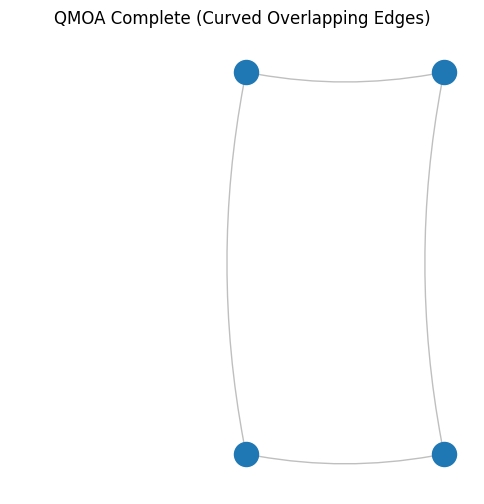

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

rows, cols = 2, 2

def build_qmoa_complete_multigraph(rows, cols):
    G = nx.MultiGraph()
    for r in range(rows):
        for c in range(cols):
            G.add_node((r, c))

    for r in range(rows):
        row_nodes = [(r, c) for c in range(cols)]
        for i in range(len(row_nodes)):
            for j in range(i + 1, len(row_nodes)):
                G.add_edge(row_nodes[i], row_nodes[j])

    for c in range(cols):
        col_nodes = [(r, c) for r in range(rows)]
        for i in range(len(col_nodes)):
            for j in range(i + 1, len(col_nodes)):
                G.add_edge(col_nodes[i], col_nodes[j])
    return G

def grid_layout(rows, cols):
    return {(i, j): (j, -i) for i in range(rows) for j in range(cols)}

# Build graph and layout
G = build_qmoa_complete_multigraph(rows, cols)
pos = grid_layout(rows, cols)

plt.figure(figsize=(6, 6))

# Use curved edges for visibility
for u, v, data in G.edges(keys=False, data=True):
    rad = 0.1 if u[0] == v[0] or u[1] == v[1] else 0.0  # curve only row/column overlaps
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], connectionstyle=f"arc3,rad={rad}", edge_color="gray", alpha=0.5)

nx.draw_networkx_nodes(G, pos, node_size=300)
plt.title("QMOA Complete (Curved Overlapping Edges)")
plt.axis("off")
plt.show()

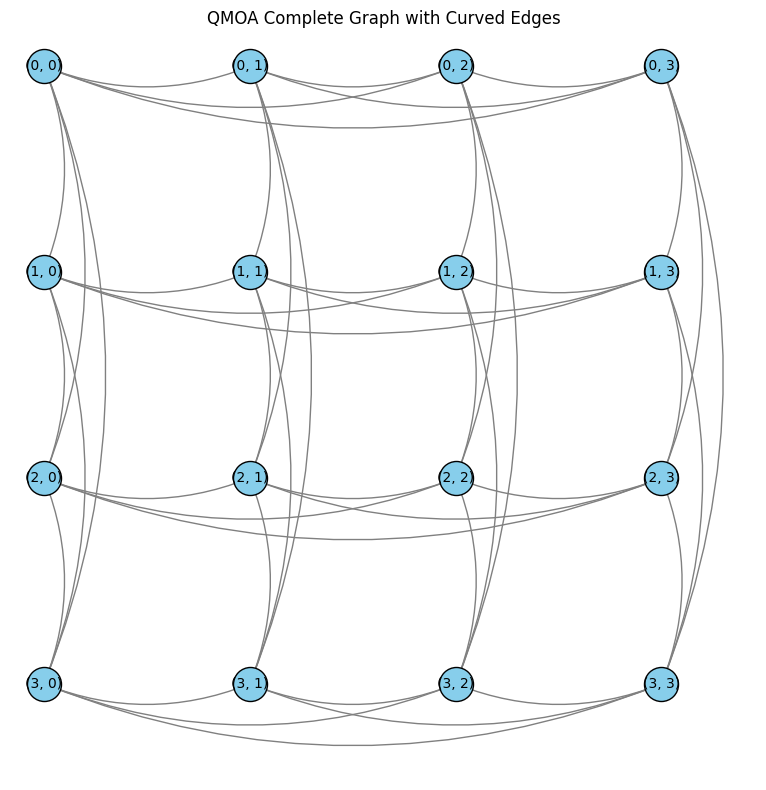

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch

# === QMOA Complete Graph Constructor ===
def build_qmoa_complete(rows, cols):
    G = nx.Graph()
    for r in range(rows):
        for c in range(cols):
            G.add_node((r, c))
    # Add all-to-all in rows
    for r in range(rows):
        row_nodes = [(r, c) for c in range(cols)]
        for i in range(len(row_nodes)):
            for j in range(i + 1, len(row_nodes)):
                G.add_edge(row_nodes[i], row_nodes[j])
    # Add all-to-all in columns
    for c in range(cols):
        col_nodes = [(r, c) for r in range(rows)]
        for i in range(len(col_nodes)):
            for j in range(i + 1, len(col_nodes)):
                G.add_edge(col_nodes[i], col_nodes[j])
    return G

# === Grid Layout ===
def grid_layout(rows, cols, scale=1.0):
    return {(r, c): (scale * c, -scale * r) for r in range(rows) for c in range(cols)}

# === Curved Edge Drawer using FancyArrowPatch ===
def draw_with_curved_edges(G, pos, title="QMOA Complete Graph with Curved Edges"):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(title)

    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color="skyblue", edgecolors="black", node_size=600)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

    seen = set()
    for u, v in G.edges():
        if (u, v) in seen or (v, u) in seen:
            continue
        seen.add((u, v))

        x1, y1 = pos[u]
        x2, y2 = pos[v]

        # Adjust curvature based on whether edge is row or column
        if u[0] == v[0]:  # same row → curve horizontally
            rad = 0.2
        elif u[1] == v[1]:  # same column → curve vertically
            rad = -0.2
        else:
            rad = 0.0  # shouldn't happen

        arrow = FancyArrowPatch((x1, y1), (x2, y2),
                                connectionstyle=f"arc3,rad={rad}",
                                color="gray",
                                arrowstyle="-",
                                linewidth=1.0)
        ax.add_patch(arrow)

    ax.set_aspect("equal")
    ax.axis("off")
    plt.tight_layout()
    plt.show()

# === Run Example ===
rows, cols = 4, 4  # Adjust as needed
G = build_qmoa_complete(rows, cols)
pos = grid_layout(rows, cols, scale=2.0)
draw_with_curved_edges(G, pos)

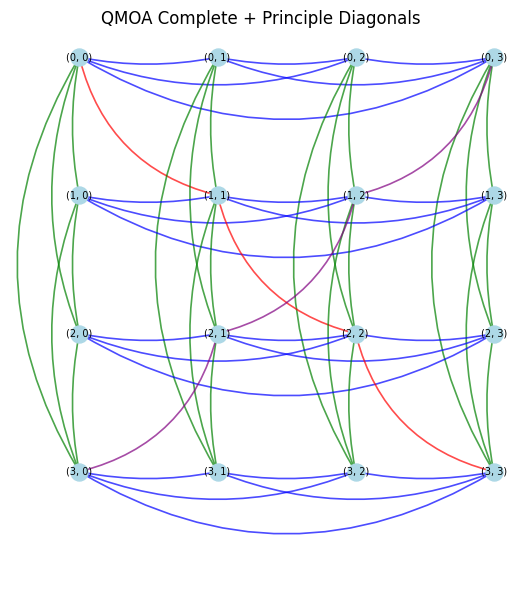

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Build QMOA Complete + Diagonals Graph
def build_qmoa_with_diagonals(rows, cols):
    G = nx.Graph()

    for r in range(rows):
        for c in range(cols):
            G.add_node((r, c), pos=(c, -r))  # Fixed layout (x=c, y=-r)

    # Full connections in each row
    for r in range(rows):
        row_nodes = [(r, c) for c in range(cols)]
        for i in range(len(row_nodes)):
            for j in range(i + 1, len(row_nodes)):
                G.add_edge(row_nodes[i], row_nodes[j], type='row', rad=0.1*(j - i))

    # Full connections in each column
    for c in range(cols):
        col_nodes = [(r, c) for r in range(rows)]
        for i in range(len(col_nodes)):
            for j in range(i + 1, len(col_nodes)):
                G.add_edge(col_nodes[i], col_nodes[j], type='col', rad=0.1*(j - i))

    # Add main and anti-diagonals
    for i in range(min(rows - 1, cols - 1)):
        G.add_edge((i, i), (i + 1, i + 1), type='main_diag', rad=0.3)
        G.add_edge((i, cols - 1 - i), (i + 1, cols - 2 - i), type='anti_diag', rad=-0.3)

    return G

# FancyArrowPatch Edge Drawer
def draw_graph_with_curved_edges(G):
    pos = nx.get_node_attributes(G, 'pos')
    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=150, node_color="lightblue")
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=7)

    # Draw curved edges using FancyArrowPatch
    for u, v, data in G.edges(data=True):
        rad = data.get("rad", 0.2)
        color = {
            'row': 'blue',
            'col': 'green',
            'main_diag': 'red',
            'anti_diag': 'purple'
        }.get(data.get('type', ''), 'gray')

        patch = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                connectionstyle=f"arc3,rad={rad}",
                                arrowstyle='-',  # no arrowhead
                                color=color,
                                alpha=0.7,
                                linewidth=1.2)
        ax.add_patch(patch)

    ax.set_aspect('equal')
    plt.axis('off')
    plt.title("QMOA Complete + Principle Diagonals ")
    plt.tight_layout()
    plt.show()

# Run
G = build_qmoa_with_diagonals(4, 4)
draw_graph_with_curved_edges(G)

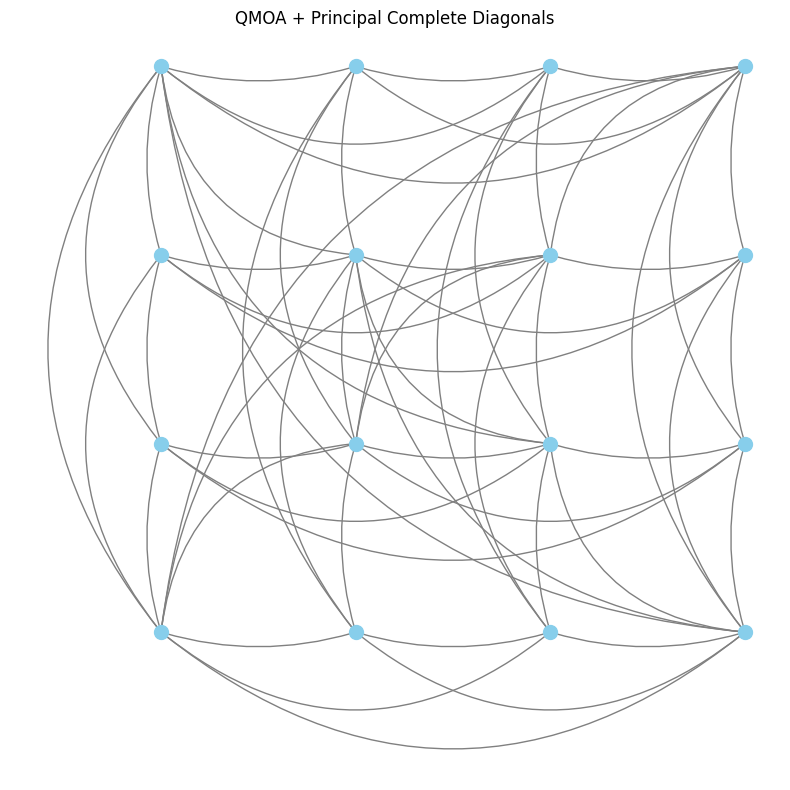

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch

def build_qmoa_with_principal_complete_diagonals(rows, cols):
    G = nx.Graph()

    for r in range(rows):
        for c in range(cols):
            G.add_node((r, c))

    # Row-wise complete connections
    for r in range(rows):
        row = [(r, c) for c in range(cols)]
        for i in range(len(row)):
            for j in range(i + 1, len(row)):
                G.add_edge(row[i], row[j])

    # Column-wise complete connections
    for c in range(cols):
        col = [(r, c) for r in range(rows)]
        for i in range(len(col)):
            for j in range(i + 1, len(col)):
                G.add_edge(col[i], col[j])

    # Principal main diagonal (↘)
    main_diag = [(i, i) for i in range(min(rows, cols))]
    for i in range(len(main_diag)):
        for j in range(i + 1, len(main_diag)):
            G.add_edge(main_diag[i], main_diag[j])

    # Principal anti-diagonal (↙)
    anti_diag = [(i, cols - 1 - i) for i in range(min(rows, cols))]
    for i in range(len(anti_diag)):
        for j in range(i + 1, len(anti_diag)):
            G.add_edge(anti_diag[i], anti_diag[j])

    return G

# Visualization using FancyArrowPatch
def visualize_graph_with_curves(G, rows, cols, title="QMOA + Principal Complete Diagonals"):
    pos = {(i, j): (j, -i) for i in range(rows) for j in range(cols)}

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(title)
    ax.set_axis_off()

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=100, node_color="skyblue")

    # Draw curved edges using FancyArrowPatch
    seen = set()
    for u, v in G.edges():
        key = tuple(sorted((u, v)))
        if key in seen:
            continue
        seen.add(key)

        x1, y1 = pos[u]
        x2, y2 = pos[v]

        rad = 0.15 if abs(x1 - x2) + abs(y1 - y2) <= 1 else 0.4
        arrow = FancyArrowPatch((x1, y1), (x2, y2),
                                connectionstyle=f"arc3,rad={rad}",
                                color="gray",
                                linewidth=1,
                                arrowstyle='-')
        ax.add_patch(arrow)

    plt.tight_layout()
    plt.show()

# Parameters
rows, cols = 4, 4

# Build and visualize
G = build_qmoa_with_principal_complete_diagonals(rows, cols)
visualize_graph_with_curves(G, rows, cols)

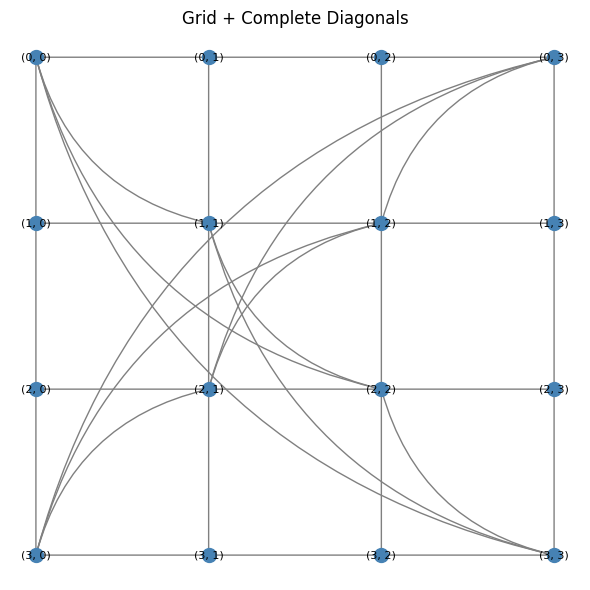

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def visualize_grid_with_diagonal_completes(G, rows, cols, title="Grid + Complete Diagonals"):
    # Manual grid layout
    pos = {(i, j): (j, -i) for i in range(rows) for j in range(cols)}

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(title)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=100, node_color="steelblue", ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

    # Draw curved edges
    for u, v in G.edges():
        if u == v:
            continue
        delta = abs(u[0] - v[0]) + abs(u[1] - v[1])
        rad = 0.3 if delta > 1 else 0.0  # curve for non-neighbors (diagonal completes)
        arrow = FancyArrowPatch(posA=pos[u], posB=pos[v],
                                connectionstyle=f"arc3,rad={rad}",
                                arrowstyle='-', color='gray', lw=1)
        ax.add_patch(arrow)

    ax.axis("off")
    plt.tight_layout()
    plt.show()
rows, cols = 4, 4
G = build_grid_plus_diagonal_complete(rows, cols)
visualize_grid_with_diagonal_completes(G, rows, cols)

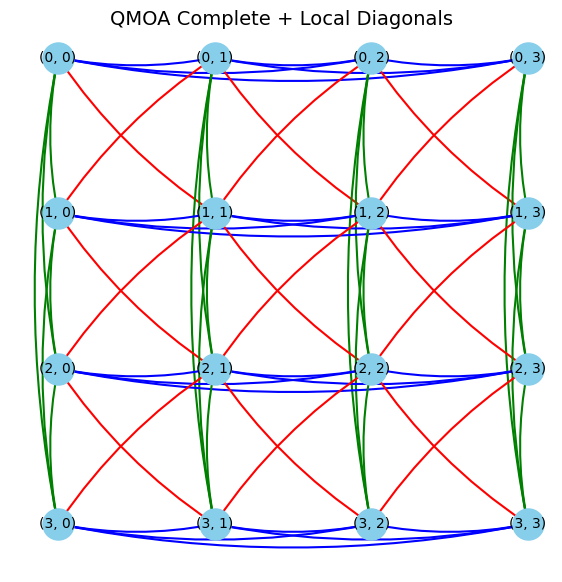

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import networkx as nx

def build_qmoa_complete_with_local_diagonals(rows, cols):
    G = nx.Graph()
    for r in range(rows):
        for c in range(cols):
            G.add_node((r, c))
    # Fully connect rows
    for r in range(rows):
        row_nodes = [(r, c) for c in range(cols)]
        for i in range(len(row_nodes)):
            for j in range(i + 1, len(row_nodes)):
                G.add_edge(row_nodes[i], row_nodes[j])
    # Fully connect columns
    for c in range(cols):
        col_nodes = [(r, c) for r in range(rows)]
        for i in range(len(col_nodes)):
            for j in range(i + 1, len(col_nodes)):
                G.add_edge(col_nodes[i], col_nodes[j])
    # Add LOCAL diagonals (nearest neighbors)
    for r in range(rows - 1):
        for c in range(cols - 1):
            G.add_edge((r, c), (r + 1, c + 1))
            G.add_edge((r + 1, c), (r, c + 1))
    return G

def draw_graph_fancy(G, rows, cols, title="QMOA Complete + Local Diagonals"):
    pos = {(r, c): (c, -r) for r, c in G.nodes()}  # Grid layout

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(title, fontsize=14)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', ax=ax)

    # Draw edges using FancyArrowPatch for nice curves
    for (u, v) in G.edges():
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        color = 'gray'
        # Row edges = blue
        if u[0] == v[0]:
            color = 'blue'
        # Column edges = green
        elif u[1] == v[1]:
            color = 'green'
        # Diagonal edges = red
        else:
            color = 'red'

        # Use a curve for clarity
        arrow = FancyArrowPatch((x1, y1), (x2, y2),
                                connectionstyle="arc3,rad=0.1",
                                color=color,
                                linewidth=1.5,
                                arrowstyle='-')
        ax.add_patch(arrow)

    # Labels
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)
    ax.axis('off')
    plt.show()

# Build and visualize for 4x4
rows, cols = 4, 4
G_local_diag = build_qmoa_complete_with_local_diagonals(rows, cols)
draw_graph_fancy(G_local_diag, rows, cols)